In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from math import *
from copy import *
import operator

In [ ]:
def cargar_imagen(path):
  imagen = cv2.imread(path)
  return imagen
def binarizar(imagen):
  gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  ret, th = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV)
  return (ret,th)
def dimenzionar(imagen,tam_x=500,tam_y=500):
  imagen_dimensionada = cv2.resize(imagen,(tam_x,tam_y),interpolation=cv2.INTER_CUBIC)
  return imagen_dimensionada
def cortar(imagen,tam_x,tam_y):
  model = imagen.shape
  size_x = model[0]
  size_y  = model[1]
  hx = int(tam_x) #espaciados en x
  hy = int(tam_y)   #espaciados en y
  n_rows = floor(size_x/tam_x)
  n_columns = floor(size_y/tam_y)

  matriz = [None] * n_rows
  for i in range(n_rows):
      matriz[i] = [None] * n_columns

  for i in range(0,n_rows):
    for j in range(0,n_columns):
      matriz[i][j] = imagen[i*hx:i*hx+hx,j*hy:j*hy+hy]
  return matriz
def mostrar_cortes(image_matrix,n_rows, n_columns):
  for i in range(n_rows):
    for j in range(n_columns):
      cv2_imshow(image_matrix[i][j])
def encontrar_color(imagen_hsv):
  imagen_hsv2 = copy(imagen_hsv)

  #cargando umbral de color:
  umbralBajo_color = np.array([0,100,20],np.uint8)
  umbralAlto_color = np.array([179,255,255],np.uint8)
 

  #hacemos la mask y filtramos en la original
  mask = cv2.inRange(img_hsv, umbralBajo_color, umbralAlto_color)
  contornos_color = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1]


  is_area = 0

  try:
    if len(contornos_color) > 0:
      is_area = 1
  except Exception as e:
    print("Parece que no hay bordes: ",e)
    is_area = 0
  return is_area
def is_rectangular(imagen_binaria):
  x = len(obtener_puntos_contornos(imagen_binaria)[0])
  if x == 4:
    return 1
  else:
    return 0.5
def enumerar(imagen):
  ter,binarizada  = binarizar(imagen)
  imagen_hsv = cv2.cvtColor(imagen,cv2.COLOR_BGR2HSV)
  is_area = encontrar_color(imagen_hsv)
  if is_area == 1:
    return is_rectangular(binarizada)
  else:
    return is_area
def analizar_contornos(imagen):
  contornos , jerarquia = cv2.findContours(imagen,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  return (contornos,jerarquia)
def obtener_puntos_contornos(imagen):
  analizar = analizar_contornos(imagen)
  contornos = analizar[0]
  jerarquia = analizar[1]
  x = []
  y = []
  tam_x = imagen.shape[0] 
  tam_y = imagen.shape[1]
  for i in contornos:
    for j in i:
      for k in j:
        x.append(k[0])
        y.append(tam_y -1 - k[1])
  return (x,y)
def its_area(binarizada):
  area = cv2.contourArea(analizar_contornos(imagen=binarizada)[0][0])
  return area

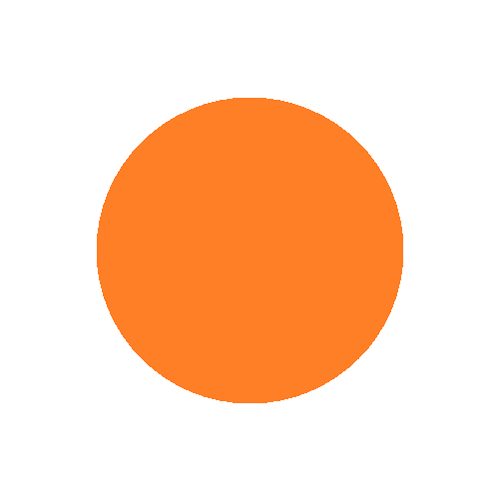

In [ ]:
#@title Ingresar medidas
ruta_imagen = "/content/imagen4.png" #@param {type:"string"}
tam_x_ceramica =  50#@param {type:"integer"}
tam_y_ceramica =  50#@param {type:"integer"}
tam_x_imagen =  500#@param {type:"integer"}
tam_y_imagen =  500#@param {type:"integer"}
try:
  imagen = cargar_imagen(ruta_imagen)
  imagen = dimenzionar(imagen,tam_x_imagen,tam_y_imagen)
  cv2_imshow(imagen)
except Exception as e:
  print("Tyipe Exception: ",type(e),": ",e)

**Binarizamos la imagen**

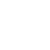

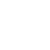

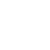

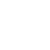

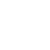

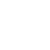

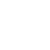

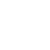

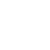

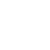

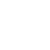

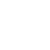

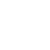

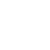

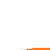

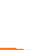

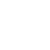

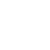

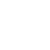

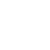

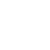

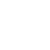

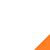

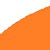

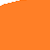

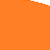

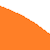

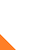

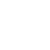

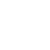

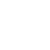

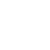

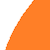

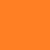

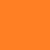

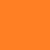

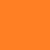

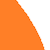

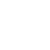

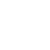

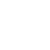

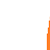

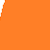

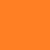

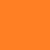

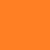

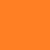

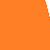

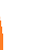

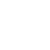

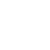

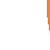

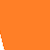

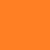

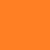

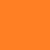

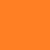

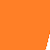

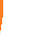

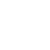

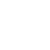

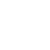

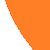

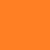

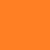

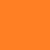

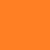

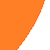

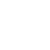

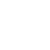

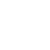

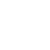

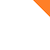

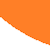

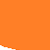

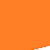

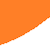

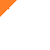

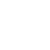

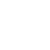

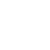

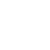

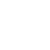

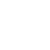

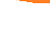

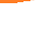

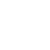

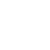

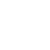

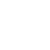

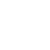

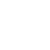

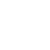

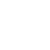

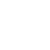

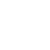

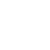

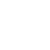

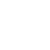

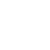

In [ ]:
imagen2 = copy(imagen)
imagen3 = copy(imagen)
matriz_imagenes = cortar(imagen2,tam_x_ceramica,tam_y_ceramica)
matriz_imagenes_binarias = cortar(binarizar(imagen3)[1],tam_x_ceramica,tam_y_ceramica)

model = imagen2.shape
size_x = model[0]
size_y  = model[1]
n_rows = floor(size_x/tam_x_ceramica)
n_columns = floor(size_y/tam_y_ceramica)
matriz_representante = [None] * n_rows
for i in range(n_rows):
  matriz_representante[i] = [None] * n_columns
for i in range(n_rows):
  for j in range(n_columns):
    matriz_representante[i][j] = enumerar(matriz_imagenes[i][j])
mostrar_cortes(matriz_imagenes,n_rows,n_columns)




In [ ]:
areas = {}
n_ceramicas = 0
for i in range(n_rows):
  for j in range(n_columns):
    if matriz_representante[i][j] == 1:
      n_ceramicas += 1
    elif matriz_representante[i][j] == 0.5:
      try:
        contornos ,hierarchy  = cv2.findContours(matriz_imagenes_binarias[i][j], cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        areas[str(i) + ',' + str(j)]= cv2.contourArea(contornos[0])
      except Exception as e:
        print(e)
      
    else:
      n_ceramicas +=0
print("Hay ",n_ceramicas," ceramicas  que se deben utilizar por el momento.")

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out o

**Las areas que faltan completar son: (Limpiamos ruido)**

In [ ]:
print(areas)

{'1,4': 17.5, '1,5': 16.5, '2,2': 98.0, '2,3': 1501.0, '2,4': 2348.0, '2,5': 2347.0, '2,6': 1503.0, '2,7': 98.0, '3,2': 1527.0, '3,7': 1528.0, '4,1': 39.0, '4,2': 2361.5, '4,7': 2361.5, '4,8': 40.0, '5,1': 42.0, '5,2': 2366.5, '5,7': 2366.5, '5,8': 42.0, '6,2': 1555.0, '6,7': 1560.0, '7,2': 112.5, '7,3': 1554.0, '7,4': 2365.5, '7,5': 2366.5, '7,6': 1555.0, '7,7': 113.0, '8,4': 41.0, '8,5': 41.0}


In [ ]:
areas_sorted = sorted(areas.items(),key=operator.itemgetter(1),reverse=True)
areas_sorted


[('5,2', 2366.5),
 ('5,7', 2366.5),
 ('7,5', 2366.5),
 ('7,4', 2365.5),
 ('4,2', 2361.5),
 ('4,7', 2361.5),
 ('2,4', 2348.0),
 ('2,5', 2347.0),
 ('6,7', 1560.0),
 ('6,2', 1555.0),
 ('7,6', 1555.0),
 ('7,3', 1554.0),
 ('3,7', 1528.0),
 ('3,2', 1527.0),
 ('2,6', 1503.0),
 ('2,3', 1501.0),
 ('7,7', 113.0),
 ('7,2', 112.5),
 ('2,2', 98.0),
 ('2,7', 98.0),
 ('5,1', 42.0),
 ('5,8', 42.0),
 ('8,4', 41.0),
 ('8,5', 41.0),
 ('4,8', 40.0),
 ('4,1', 39.0),
 ('1,4', 17.5),
 ('1,5', 16.5)]

In [ ]:
#@title Texto de título predeterminado
presicion_corte =  2#@param {type:"integer"}
h = presicion_corte

Nueva corte: 


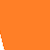

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


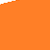

.....................
El punto optimo de corte esta en Y =  51
Nueva corte: 


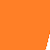

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


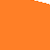

.....................
El punto optimo de corte esta en Y =  51
Nueva corte: 


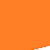

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 2
Se rotó 180° la imagen en sentido horario.


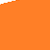

.....................
El punto optimo de corte esta en Y =  51
Nueva corte: 


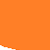

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 2
Se rotó 180° la imagen en sentido horario.


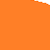

.....................
El punto optimo de corte esta en Y =  51
Nueva corte: 


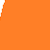

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


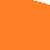

.....................
El punto optimo de corte esta en Y =  51
Nueva corte: 


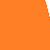

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


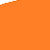

.....................
El punto optimo de corte esta en Y =  51
Nueva corte: 


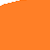

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


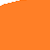

El punto optimo de corte esta en Y =  51
Nueva corte: 


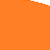

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


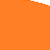

El punto optimo de corte esta en Y =  51
Nueva corte: 


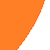

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


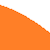

.....................
El punto optimo de corte esta en Y =  46
Nueva corte: 


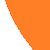

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


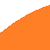

.....................
El punto optimo de corte esta en Y =  46
Nueva corte: 


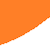

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 2
Se rotó 180° la imagen en sentido horario.


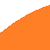

.....................
El punto optimo de corte esta en Y =  46
Nueva corte: 


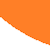

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 2
Se rotó 180° la imagen en sentido horario.


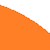

.....................
El punto optimo de corte esta en Y =  46
Nueva corte: 


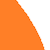

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


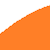

.....................
El punto optimo de corte esta en Y =  45
Nueva corte: 


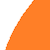

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


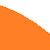

.....................
El punto optimo de corte esta en Y =  45
Nueva corte: 


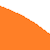

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


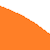

El punto optimo de corte esta en Y =  45
Nueva corte: 


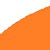

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


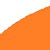

El punto optimo de corte esta en Y =  45
Nueva corte: 


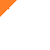

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


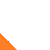

.....................
El punto optimo de corte esta en Y =  17
Nueva corte: 


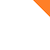

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


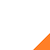

.....................
El punto optimo de corte esta en Y =  17
Nueva corte: 


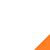

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


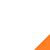

El punto optimo de corte esta en Y =  16
Nueva corte: 


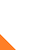

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


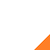

.....................
El punto optimo de corte esta en Y =  16
Nueva corte: 


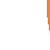

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


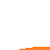

.....................
El punto optimo de corte esta en Y =  4
Nueva corte: 


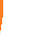

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


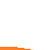

.....................
El punto optimo de corte esta en Y =  4
Nueva corte: 


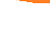

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 2
Se rotó 180° la imagen en sentido horario.


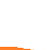

.....................
El punto optimo de corte esta en Y =  4
Nueva corte: 


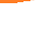

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 2
Se rotó 180° la imagen en sentido horario.


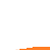

.....................
El punto optimo de corte esta en Y =  4
Nueva corte: 


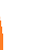

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 4
Se rotó 270° la imagen en sentido horario.


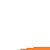

.....................
El punto optimo de corte esta en Y =  4
Nueva corte: 


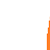

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 3
Se rotó 90° la imagen en sentido horario.


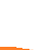

.....................
El punto optimo de corte esta en Y =  4
Nueva corte: 


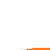

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


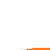

El punto optimo de corte esta en Y =  3
Nueva corte: 


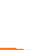

¿En donde se se ubica el punto de corte para usted?
1. Va arriba.
2. Va abajo.
3. Va a la izquierda.
4. Va a la derecha.
Elige una opcion de las 4: 1
Se dejó inmóbil la imagen.


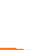

El punto optimo de corte esta en Y =  3


In [ ]:
indice = 0
tam = len(areas_sorted)
optimos_areas = []
while indice < tam:
  coordenada_area =areas_sorted[indice][0].split(',')
  i = int(coordenada_area[0])
  j = int(coordenada_area[1])
  print("Nueva corte: ")
  cv2_imshow(matriz_imagenes[i][j])
  print("¿En donde se se ubica el punto de corte para usted?")
  print("1. Va arriba.")
  print("2. Va abajo.")
  print("3. Va a la izquierda.")
  print("4. Va a la derecha.")
  opcion = int(input('Elige una opcion de las 4: '))
  if opcion == 1:
    print("Se dejó inmóbil la imagen.")
    cv2_imshow(matriz_imagenes[i][j])
    Ymax = max(obtener_puntos_contornos(matriz_imagenes_binarias[i][j])[1]) + h
    optimos_areas.append(Ymax)
    print("El punto optimo de corte esta en Y = ",Ymax)
    indice += 1
  elif opcion == 2:
    print("Se rotó "+ str(180) + "° la imagen en sentido horario.")
    im = copy(matriz_imagenes[i][j])
    imb = copy(matriz_imagenes_binarias[i][j])
    matriz_imagenes[i][j] = cv2.rotate(im,cv2.ROTATE_180)
    matriz_imagenes_binarias[i][j] = cv2.rotate(imb,cv2.ROTATE_180)
    cv2_imshow(matriz_imagenes[i][j])  
    print(".....................")
    Ymax = max(obtener_puntos_contornos(matriz_imagenes_binarias[i][j])[1]) + h
    optimos_areas.append(Ymax)
    print("El punto optimo de corte esta en Y = ",Ymax)
    indice += 1
  elif opcion == 3:
    print("Se rotó "+ str(90) + "° la imagen en sentido horario.")
    im = copy(matriz_imagenes[i][j])
    imb = copy(matriz_imagenes_binarias[i][j])
    matriz_imagenes[i][j] = cv2.rotate(im,cv2.ROTATE_90_CLOCKWISE)
    matriz_imagenes_binarias[i][j] = cv2.rotate(imb,cv2.ROTATE_90_CLOCKWISE)
    cv2_imshow(matriz_imagenes[i][j]) 
    print(".....................")
    Ymax = max(obtener_puntos_contornos(matriz_imagenes_binarias[i][j])[1]) + h 
    optimos_areas.append(Ymax)
    print("El punto optimo de corte esta en Y = ",Ymax)
    indice += 1
  elif opcion == 4:
    print("Se rotó "+ str(270) + "° la imagen en sentido horario.")
    im = copy(matriz_imagenes[i][j])
    imb = copy(matriz_imagenes_binarias[i][j])
    matriz_imagenes[i][j] = cv2.rotate(im,cv2.ROTATE_90_COUNTERCLOCKWISE)
    matriz_imagenes_binarias[i][j] = cv2.rotate(imb,cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2_imshow(matriz_imagenes[i][j])
    print(".....................")
    Ymax = max(obtener_puntos_contornos(matriz_imagenes_binarias[i][j])[1]) + h
    optimos_areas.append(Ymax)
    print("El punto optimo de corte esta en Y = ",Ymax)
    indice += 1
  else:
    indice += 0
  




**Se ordenan los óptimos de corte**

In [ ]:
optimos_areas.sort(reverse=True)
print(optimos_areas)


[51, 51, 51, 51, 51, 51, 51, 51]


In [4]:
def optimizar(n,lista_de_optimos,altura_maxima,Yceramica):
  if lista_de_optimos == []:
    return "Se necesitan " + str(n) + " ceramicas."
  there_is = 1
  for i in range(0,len(lista_de_optimos)):
    if altura_maxima >= lista_de_optimos[i]:
      altura_maxima = altura_maxima - lista_de_optimos[i]
      lista_de_optimos.pop(i)
      print(lista_de_optimos)
      return optimizar(n,lista_de_optimos,altura_maxima,Yceramica):
  altura_maxima = Yceramica
  n += 1
  print(lista_de_optimos)
  print("Se necesitan " + str(n) + " ceramicas.")
 




In [6]:
print([51, 51, 51, 51, 51, 51, 51, 51, 46, 46, 46, 46, 45, 45, 45, 45, 17, 17, 16, 16, 4, 4, 4, 4, 4, 4, 3, 3])

[51, 51, 51, 51, 51, 51, 51, 51, 46, 46, 46, 46, 45, 45, 45, 45, 17, 17, 16, 16, 4, 4, 4, 4, 4, 4, 3, 3]


**Reutilizando las ceramicas se usó  32 locetas**